## Web Crawler

### Busque las páginas web referidas al personaje: Leslie Lamport.  Guarde los resultados de la búsqueda en una bd orientada a grafos o un archiivo csv, que registre página (link) y página buscada (fetched). Con las páginas visitadas construya el grafo resultante. 

### Para este primer paso, lo ideal sería instalar las herramientas y librerías correspondientes

In [1]:
#Instalación de las librerías "BeautifulSoup, request, y html5lib"

import sys;

!{sys.executable} -m pip install -U bs4
!{sys.executable} -m pip install -U requests
!{sys.executable} -m pip install -U html5lib

b'<!doctype html><html lang="es-419"><head><meta charset="UTF-8"><meta content="origin" name="referrer"> <link href="/searchdomaincheck?format=opensearch" title="Buscar con Google" rel="search" type="application/opensearchdescription+xml"> <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>leslie lamport - Buscar con Google</title><script nonce="1z4YfAoIQzf2sUfGLiMUQQ">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){\nvar a=window.performance;window.start=Date.now();a:{var b=window;if(a){v
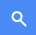
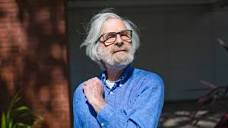

In [2]:
#Hacemos un pequeño test a el link a buscar, en este caso sería una petición GET al buscador de Google

import requests;

headers = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246"}
URL = "https://www.google.com/search?&q=leslie+lamport";
r = requests.get(URL, headers = headers);
print(r.content);

<!DOCTYPE html>
<html lang="es-419">
 <head>
  <meta charset="utf-8"/>
  <meta content="origin" name="referrer"/>
  <link href="/searchdomaincheck?format=opensearch" rel="search" title="Buscar con Google" type="application/opensearchdescription+xml"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <title>
   leslie lamport - Buscar con Google
  </title>
  <script nonce="1z4YfAoIQzf2sUfGLiMUQQ">
   (function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date
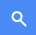
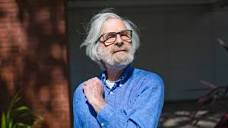

In [3]:
#Ahora, como notamos en la salida de arriba, vemos un código ilegible de HTML, entonces, gracias a BeautifulSoup
#"Parsearemos" el html, o mejor dicho, lo colocaremos de una forma mas legible, compuesto en propiedades llave-valor

from bs4 import BeautifulSoup;
  
soup = BeautifulSoup(r.content, 'html5lib'); 
print(soup.prettify());

In [4]:
#Esta función limpiará el atributo href para obtener la url absoluta.

import re;
  
def Find(string):
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))";
    url = re.findall(regex,string);
    return str( [x[0] for x in url] )[2:-2];

In [5]:
#Esta celda de codigo, obtendrá todas las etiquetas 'a' del URL principal, para luego hacer una nueva petición a estas URL
    
tags = soup('a');
allData = {};

for tag in tags:
    temp = Find(tag.get('href'));
    if(temp!=""):
        
        try: 
            r = requests.get(temp, headers = headers);
            soup = BeautifulSoup(r.content, 'html5lib'); 
            newTags = soup('a');
            allUrls = [];

            for newTag in newTags:
                newTemp = Find(tag.get('href'));
                if(newTemp!=""):
                    allUrls.append(newTemp);
            allData[temp] = allUrls;
        except: 
            print('Algo ocurrio');
                

C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [6]:
# Esta celda de código, tomará toda la info de las URLS y la transformará en un archivo .csv

import csv;

filename = 'crawlerUrls.csv';

with open(filename, 'w', newline='') as f:
    for key in allData.keys():
        f.write("%s, %s\n" % (key, allData[key]));